# Information Visualisation Project

In [1]:
# Imports 
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# Import the Dataset
data = pd.read_csv('spotify_songs.csv', sep = ',')
# Creating a second dataframe for popular tracks only
data_popular = data[data['track_popularity'] > 90]

# Part 1: All popular songs are the same

In part 1 we shall be performing the data story from the following perspective:

"Popular music sounds the same. Releasing music has become a cash grab, so everything follows a recipe for quick success. Songs nowadays are all loud, energetic and repetitive."

Our analysis begins by exploring the genre distribution in the entire dataset using a pie chart, to determine broad similarities and differences. Additionally, we utilize a second pie chart to examine the genre distribution specifically within the most popular songs (track_popularity rating of 90 or higher).

In [3]:
# Pie chart for the complete dataset
fig = px.pie(data,
             values = 'track_popularity',
             names='playlist_genre',
             title='Distribution of genres for the entire dataset',
             hole = 0.8,
             color_discrete_sequence = px.colors.qualitative.T10,)

# Update layout for no legend and better height
fig.update_layout(showlegend=False,
                  height = 400,)

# Update traces for textposition and textinfo
fig.update_traces(textposition = 'outside',
                  textinfo='label+percent')
fig.show()



<p>This pie chart illustrates the genre distribution in the entire dataset. Pop dominates with 24.5%, followed closely by rock, rap, and R&B, each hovering around 18-20%. Latin accounts for 12.5%, while EDM represents 8.75% of the songs. This  showcases the diversity of genres in the entire dataset. But when specifically looking at popular songs, there is a different distribution visible.  </p>

In [4]:
# Pie chart for the top 10% most popular songs in the dataset
fig = px.pie(data_popular,
             values = 'track_popularity',
             names='playlist_genre',
             title='Distribution of genres for popular songs',
             hole = 0.8,
             color_discrete_sequence = px.colors.qualitative.T10,)

# Update layout for no legend and better height
fig.update_layout(showlegend=False,
                  height = 400)

# Update traces for textposition and textinfo
fig.update_traces(textposition = 'outside',
                  textinfo='label+percent')
fig.show()

<p> The second pie chart reveals the genre distribution among popular songs.  Here, the dominance of Pop with 72.9% suggests a prevalence of mainstream, commercially-driven music. The comparatively lower percentages for R&B (2.96%), Latin (6.11%), and Rap (18%) furthermore indicate a lack of diversity and support the notion that popular songs today tend to conform to a formulaic approach.  </p>

|Genre| In complete dataset | In popular dataset | Difference |
| :---: | :---: | :---: | :---: |
| pop | 24.5% | 72.9% | + 48.4% |
| rap | 18.7% | 18% | - 0.7% |
| latin | 12.5% | 6.11% | - 6.39% |
| r&b | 16.6% | 2.96% | - 5.1% |
| rock | 18.9% | 0% | - 18.9% |
| edm | 8.75% | 0% | - 8.75% |


<p> The table above compares genre proportions between the entire dataset and the popular dataset. Pop stands out with a massive increase of 48.4%, while other genres, such as Rock and EDM, decrease significantly. This genre distribution supports the notion that popular music today follows a similar formula, contributing to a perceived similarity in popular songs.

After examining the overarching genres to assess the similarity of popular songs, our exploration delved deeper into investigating the individual attributes of the songs. With multiple visualizations we analyzed attributes such as danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, and tempo. These examinations revealed insights and patterns that highlighted the distinct characteristics and potential similarities among these attributes in popular music. <p>

In [5]:
# Radar chart

# Categories
categories = ['danceability', 'energy', 'liveness', 'speechiness', 'valence', 'instrumentalness', 'acousticness']
# Grab the top 10 most popular songs
top10 = data_popular.sort_values(by = 'track_popularity', ascending = False).head(10)

# Put the names and values of the Top 10 variables
labels = top10['track_name']
values = top10[categories].values

# Create figure
fig = go.Figure()

# Create Scatterpolar (radar chart)

# Use zip function for two variables in the same loop
for i, j in zip(labels, values):
    fig.add_trace(go.Scatterpolar(
        r = j,
        theta = categories,
        fill = 'toself',
        name = i,
        opacity = 0.5,
        ))
    
# Update layout for axis range of 0 to 1
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
    title = 'Distribution of Audio Features for top 10 most popular songs')
fig.show()

This Radar Chart visually represents the audio features of popular songs. Most songs exhibit concentrated shapes in the middle, indicating similar attributes like high valence and danceability but also low liveness and instrumentalness. This observation supports the claim that popular songs tend to have similar attributes, contributing to their perceived similarity in sound. 

In [6]:
# Scatter plot for the acousticness

# Grab the 100 most popular songs
fig = px.scatter(data.sort_values(by='track_popularity', ascending = False).head(100),
    x = 'instrumentalness',
    y = 'acousticness',)

# Update layout for title
fig.update_layout(title = 'Analysis of acousticness and instrumentalness for the top 100 most popular songs')

fig.show()


Continuing our exploration, we delve deeper into the attributes of popular songs using a scatter plot. Building upon the observation that popular songs tend to have low instrumentalness, we specifically analyze the relationship between instrumentalness and acousticness. Through trial and error, these two attributes were chosen due to their potential influence on song popularity.

The resulting scatter plot showcases a distinct pattern where the majority of dots align closely along the 0 line on the x-axis, indicating low instrumentalness. 
Additionally there is a slight  trend towards lower values for acousticness. This reaffirms the notion that popular songs share similar musical characteristics, particularly in terms of instrumentalness, providing further evidence of the perceived similarity in popular music.

## Part 2:

In part 2 we shall be conveying the data story from the following perspective:

"All popular songs do not sound the same, the rise of the internet has given birth to a big diversity of music."

For this analysis we will also first look at the genres to determine broad similarities and differences. Then we will continue by examing the specific attributes of popular songs, to research if popular songs are actually more diverse nowadays.

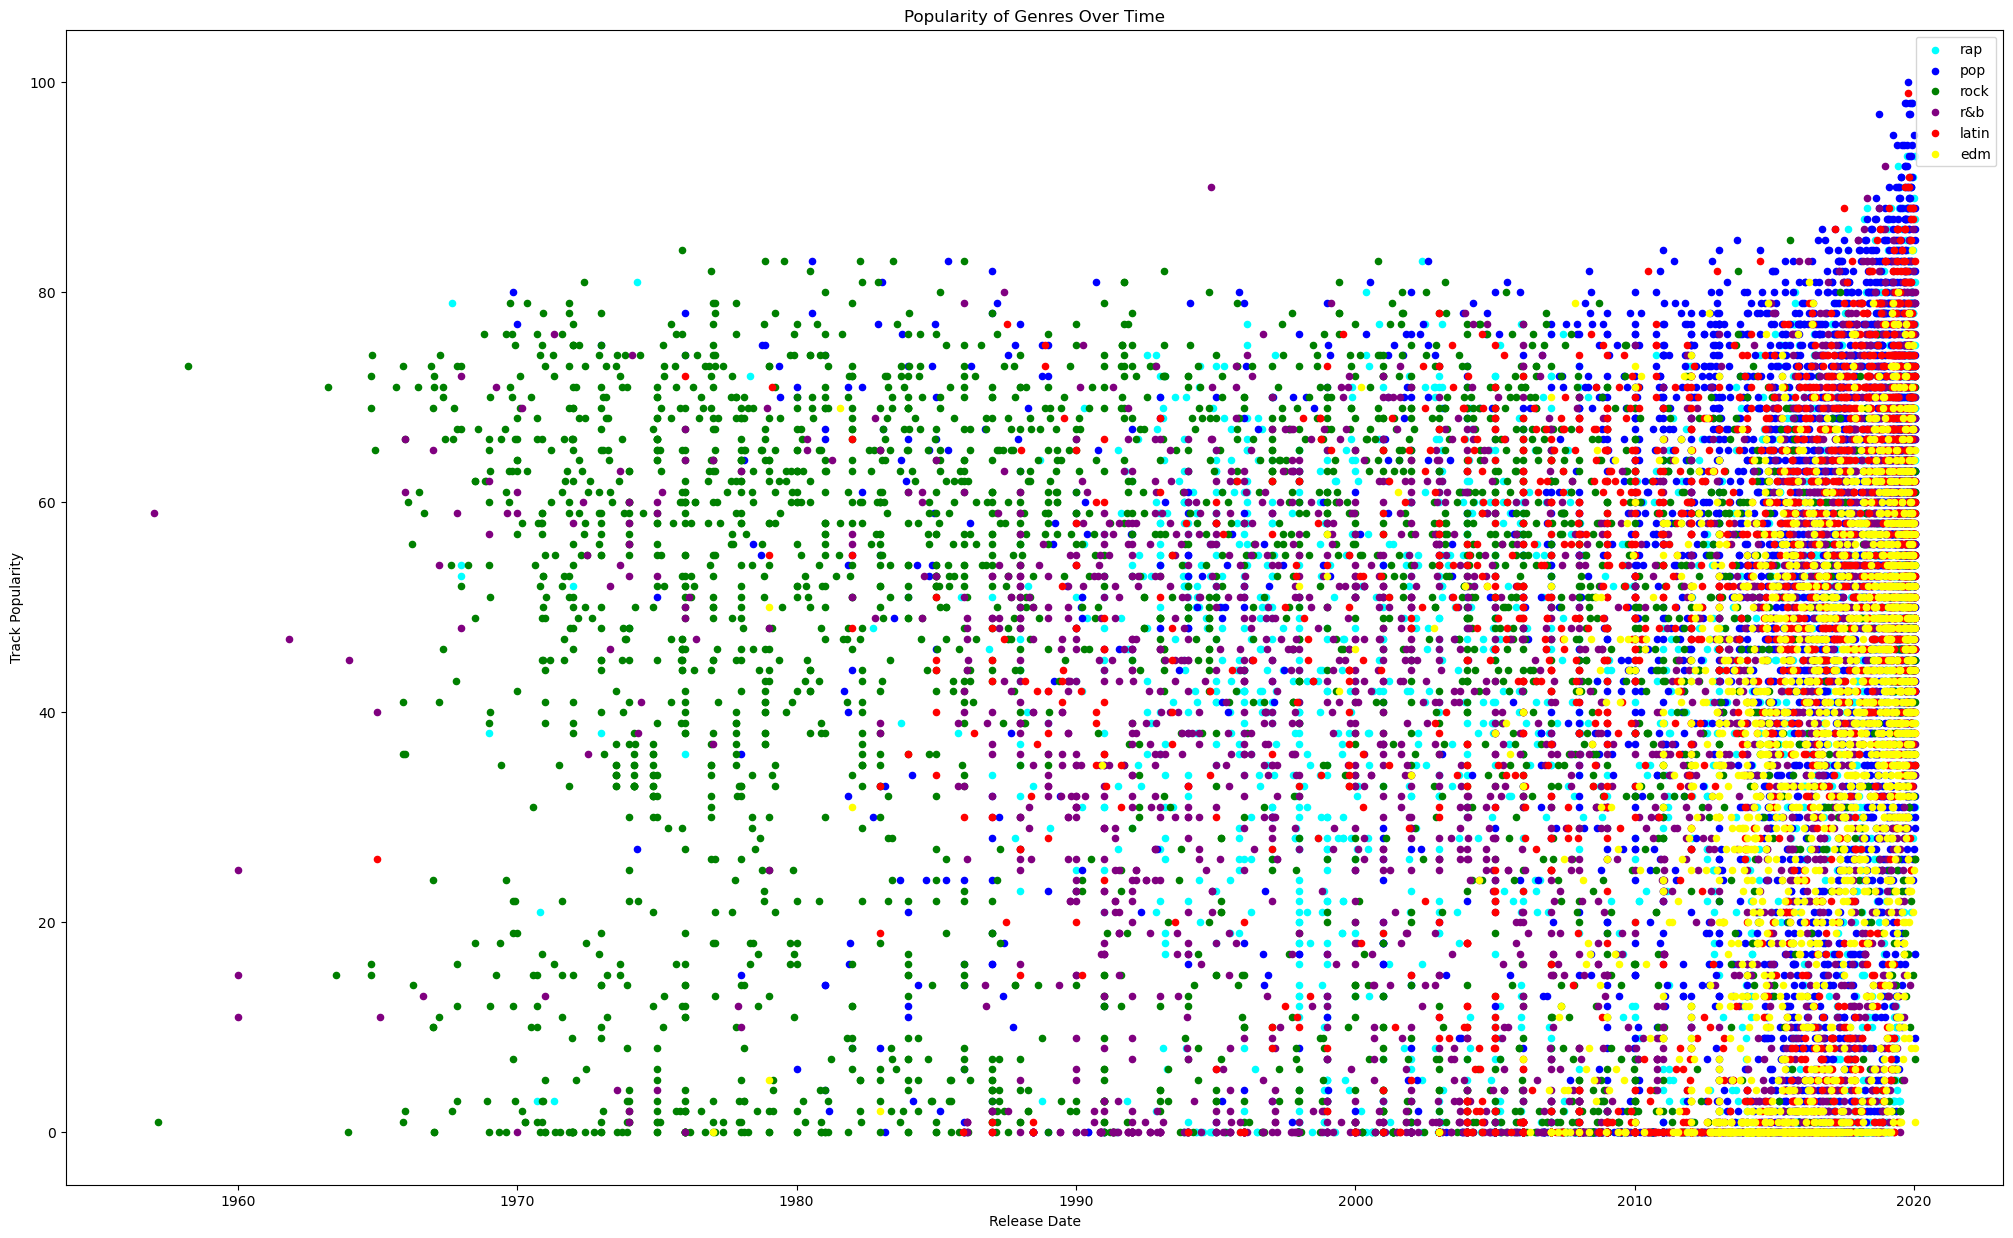

In [7]:
# Scatter plot

# Create useable date
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'])

# Colormap for coloring per genre
colormap = {
    'rap': 'cyan',
    'pop': 'blue',
    'rock': 'green',
    'r&b': 'purple',
    'latin': 'red',
    'edm': 'yellow',
}

plt.figure(figsize=(25,15))

for i in colormap:
# Plot per genre
    genre_data = data[data['playlist_genre'] == i]
    plt.scatter(genre_data['track_album_release_date'], genre_data['track_popularity'], color = colormap[i], label = i, s = 20)
    
plt.xlabel('Release Date')
plt.ylabel('Track Popularity')
plt.title('Popularity of Genres Over Time')
plt.legend()
plt.show()

This scatter plot reveals the dynamic landscape of popular music over time, showcasing the emergence and popularity of diverse genres. In the earlier years (around 1950-1990), rock and pop music prevailed. However, as we approach the present era (around 2020), we witness a proliferation of genres such as EDM, Rap and Latin music, indicating a broader spectrum of popular musical expressions. This visualization strongly supports the claim that the rise of the internet has fostered a remarkable diversity of music, challenging the notion that all popular songs sound the same.



In [8]:
# Parallel Catagories Graph 

# Take top 50 most popular songs
data_top50 = data.sort_values(by = 'track_popularity', ascending = False).head(50)

# Take top 50 least popular songs
data_bot50 = data.sort_values(by = 'track_popularity', ascending = False).tail(50)

# Concatenate into single DataFrame
data_top_bot = pd.concat([data_top50, data_bot50])

# Use qcut to categorise the top 50 and bot 50
cut_bins, cut_labels = pd.qcut(data_top_bot['track_popularity'], q = 2, labels=['Top 50', 'Bottom 50'], retbins = True)

# Note: tempo is rounded to -1 for readability sake
fig = go.Figure(go.Parcats(
    dimensions = [{'label': 'loudness', 'values': data_top_bot['loudness'].round(), 'categoryorder': 'category ascending'},
                  {'label': 'speechiness', 'values': data_top_bot['speechiness'].round(1), 'categoryorder': 'category ascending'},
                  {'label': 'acousticness', 'values': data_top_bot['acousticness'].round(1), 'categoryorder': 'category ascending'},
                  {'label': 'instrumentalness', 'values': data_top_bot['instrumentalness'].round(1), 'categoryorder': 'category ascending'},
                  {'label': 'liveness', 'values': data_top_bot['liveness'].round(1), 'categoryorder': 'category ascending'},
                  {'label': 'valence', 'values': data_top_bot['valence'].round(1), 'categoryorder': 'category ascending'},
                  {'label': 'tempo', 'values': data_top_bot['tempo'].round(-1), 'categoryorder': 'category ascending'},
                 {'label': 'Popularity', 'values': cut_bins, 'categoryorder': 'category descending'}],
    line = {'color': cut_bins.astype('category').cat.codes, 'colorscale': [[0, 'salmon'], [1, 'lightblue']]},


)
)

fig.update_layout(title = 'Characteristics of songs based on popularity',
                 height = 600)
fig.show()

This parallel categories plot provides a comprehensive view of the characteristics of popular songs across various attributes. The diagram encompasses attributes such as loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and popularity. While there is no clear connection between individual variables and song popularity, it is notable that popular songs often exhibit lower acousticness. However, apart from acousticness, there is no clear connection between individual variables and the popularity of songs. This indicates that popular songs do not adhere to a specific recipe for success and exhibit diversity.

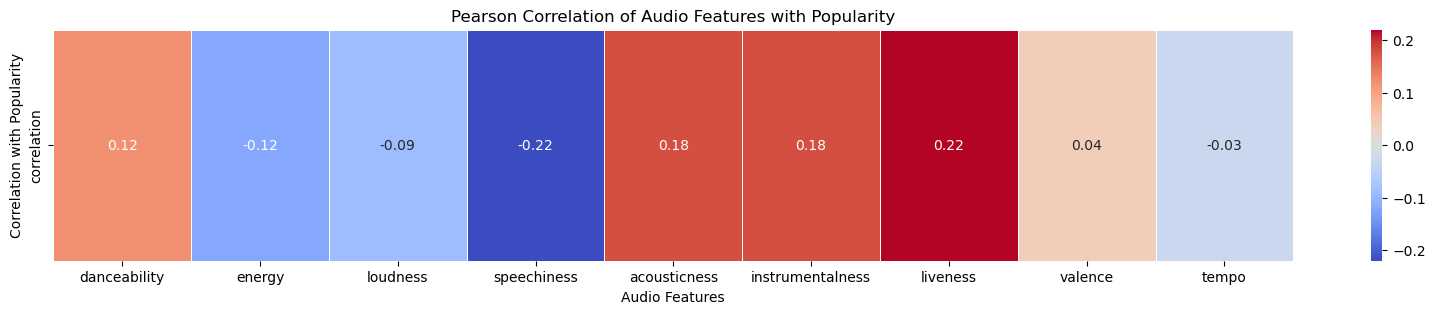

In [9]:
# Select wanted variables
variables = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create empty DataFrame
correlation_data = {}

# Fill in dictionary with correlations
for i in variables:
    corr, pvalue = pearsonr(data_popular[i], data_popular['track_popularity'])
    correlation_data[i] = corr

# Convert dictionary to DataFrame because i couldnt insert it directly ??
correlation = pd.DataFrame(correlation_data, index = ['correlation']).round(2)

# Create plot
plt.figure(figsize=(20,3))
sns.heatmap(correlation, cmap='coolwarm', annot = True, linewidths = 0.5)

# Insert labels and title
plt.xlabel('Audio Features')
plt.ylabel('Correlation with Popularity')
plt.title('Pearson Correlation of Audio Features with Popularity')
plt.show()

Lastly, this visualization presents a Pearson correlation heatmap, which reveals the correlation coefficients between each audio feature and track popularity. The results indicate that the correlations are generally weak, with coefficients ranging from -0.22 to 0.22. This suggests that there is no strong evidence to support a significant correlation between these specific song attributes and popularity. However, it is still important to note that correlation coefficients alone may not capture the full complexity of the relationship between these variables.